In [ ]:
cd "/content/drive/My Drive/Colab Notebooks/Time_Series_Projects/Data"

/content/drive/My Drive/Colab Notebooks/Time_Series_Projects/Data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('macrodata.csv',index_col=0,parse_dates=True)

In [ ]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


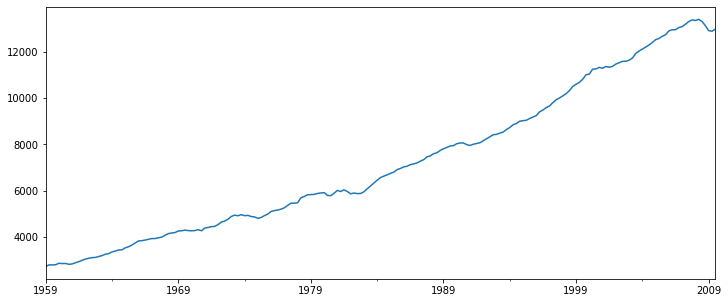

In [ ]:
df['realgdp'].plot(figsize = (12,5))

#Hadrick-Prescott
separate data in trend and cyclical components

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [ ]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'],lamb=1600)#quarterly data

In [ ]:
df['realgdp_trend'] = gdp_trend

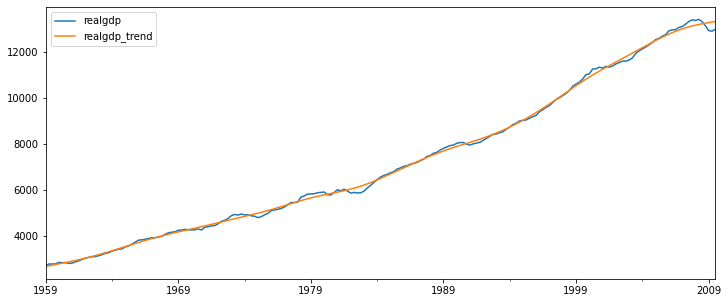

In [ ]:
df[['realgdp','realgdp_trend']].plot(figsize = (12,5))

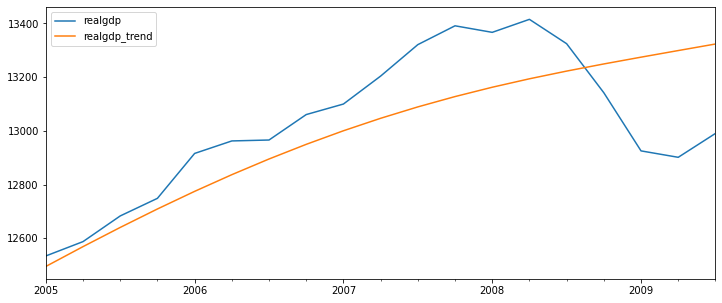

In [ ]:
df[['realgdp','realgdp_trend']]['2005-01-01':].plot(figsize = (12,5))

#ETS Decomposition
Error Trend and Seasonality

In [ ]:
airline = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)

In [ ]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
airline.dropna(inplace=True)

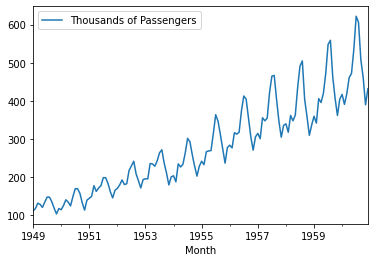

In [ ]:
airline.plot()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
result = seasonal_decompose(airline['Thousands of Passengers'])

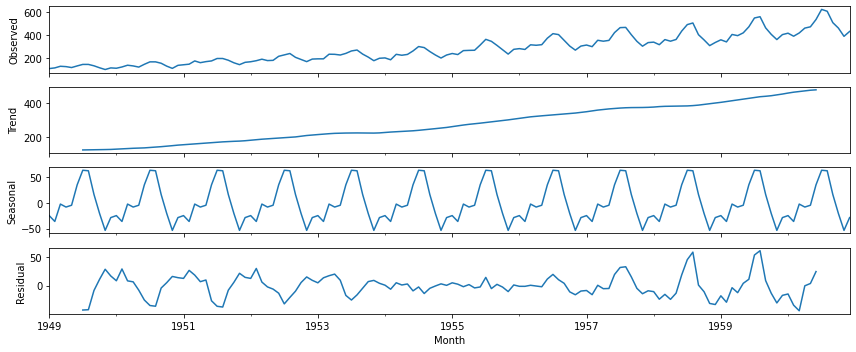

In [ ]:
from pylab import rcParams
rcParams['figure.figsize']  = 12, 5

result.plot();

#EWMA Exponential Weighted Moving Averages

In [ ]:
airline = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)

In [ ]:
airline.dropna(inplace=True)

In [ ]:
airline.index = pd.to_datetime(airline.index)

In [ ]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
#Simple Moving Averages
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

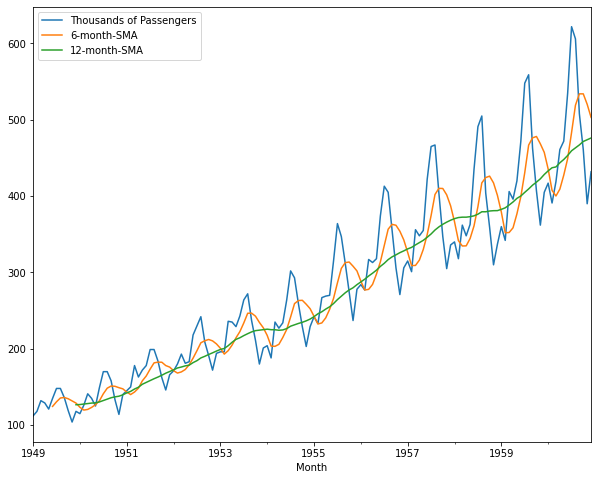

In [ ]:
airline.plot(figsize=(10,8))

In [ ]:
airline['EWMA-12']= airline['Thousands of Passengers'].ewm(span=12).mean()

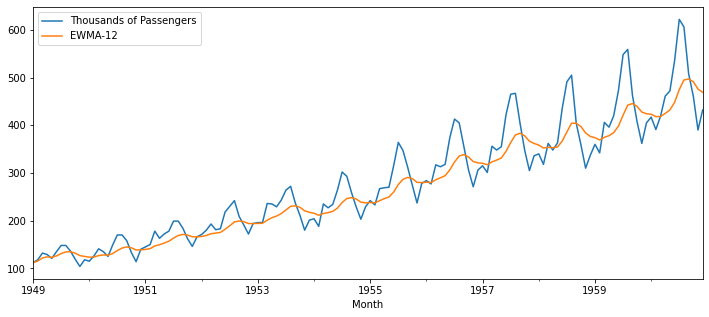

In [ ]:
airline[['Thousands of Passengers','EWMA-12']].plot()

#Holt Winters
Tripple Exponential Smoothing
 - Level (1st level)
 - Trend (2nd level)
 - Sesonality (3rd level)


Single Exponential Smoothing

In [ ]:
airline = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)

In [ ]:
airline.dropna(inplace=True)

In [ ]:
airline.index = pd.to_datetime(airline.index)

In [ ]:
airline.index.freq = 'MS'

In [ ]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [ ]:
span = 12
alpha = 2/(span+1)
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(alpha=alpha,adjust=True).mean()

In [ ]:
model = SimpleExpSmoothing(airline['Thousands of Passengers'])

In [ ]:
fitted_model = model.fit(smoothing_level=alpha,optimized=False)

In [ ]:
airline['SES12'] = fitted_model.fittedvalues.shift(-1)

In [ ]:
airline.head()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,115.250000,112.923077
1949-03-01,132,121.787529,115.857988
1949-04-01,129,124.064224,117.879836
1949-05-01,121,123.231685,118.359861


Double Exponential Smoothing

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
airline['DES_add_12'] = ExponentialSmoothing(airline['Thousands of Passengers'],trend="add").fit().fittedvalues.shift(-1)

In [ ]:
airline['DES_mul_12'] = ExponentialSmoothing(airline['Thousands of Passengers'],trend="mul").fit().fittedvalues.shift(-1)

In [ ]:
airline.head()

,Thousands of Passengers,EWMA12,SES12,DES_add_12,DES_mul_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.336233,112.049247
1949-02-01,118,115.250000,112.923077,120.336233,118.051885
1949-03-01,132,121.787529,115.857988,134.336233,132.058041
1949-04-01,129,124.064224,117.879836,131.336233,129.056722
1949-05-01,121,123.231685,118.359861,123.336233,121.053204


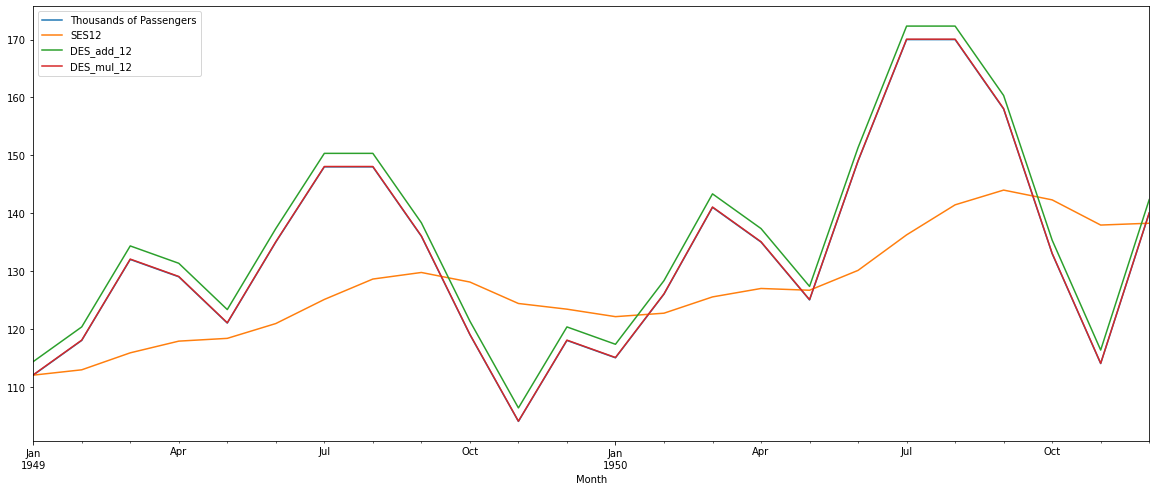

In [ ]:
airline[['Thousands of Passengers',  'SES12', 'DES_add_12','DES_mul_12']].iloc[:24].plot(figsize=(20,8))

Tripple Exponential Smoothing

In [ ]:
airline['TES_mul_12'] = ExponentialSmoothing(airline['Thousands of Passengers'],trend="mul",seasonal='mul',seasonal_periods=12).fit().fittedvalues

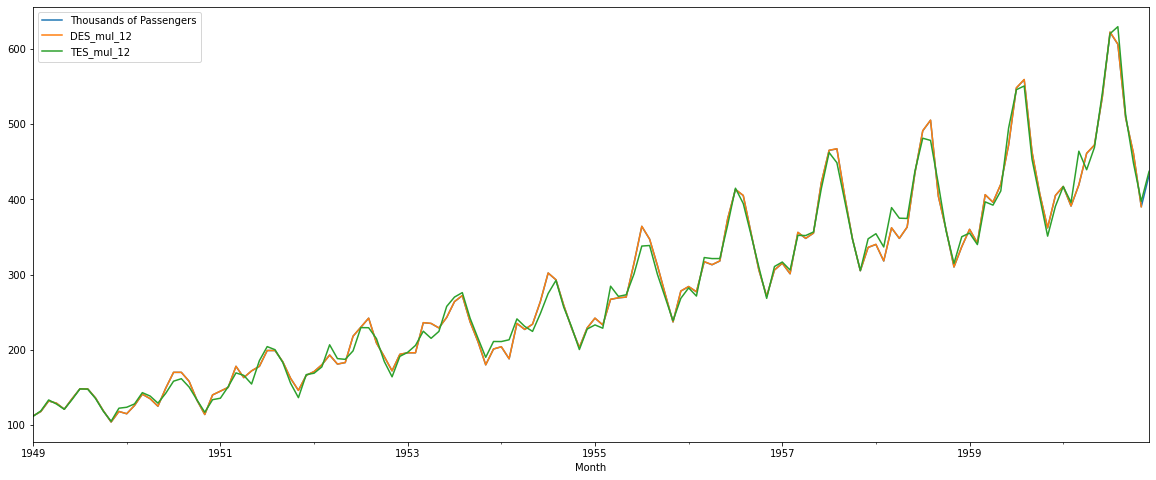

In [ ]:
airline[['Thousands of Passengers','DES_mul_12','TES_mul_12']].iloc[:].plot(figsize=(20,8))